In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Logistic Regression

In [27]:
ds = pd.read_csv("blr Titanic.csv")
ds

,age_grp,department,embarked,survived
0,40-49,3rd Class,Southampton,False
1,30-39,3rd Class,Southampton,True
2,10-19,3rd Class,Southampton,False
3,10-19,3rd Class,Southampton,False
4,20-29,Victualling,Southampton,False
...,...,...,...,...
2235,20-29,3rd Class,Cherbourg,False
2236,20-29,3rd Class,Cherbourg,False
2237,20-29,A la Carte,Southampton,False
2238,20-29,A la Carte,Southampton,False


In [28]:
ds["age_grp"].unique()

array(['40-49', '30-39', '10-19', '20-29', '0-9', '60-69', '50-59',
       '70-79', nan], dtype=object)

In [29]:
ds["department"].unique()

array(['3rd Class', 'Victualling', '2nd Class', 'Engine', 'A la Carte',
       '1st Class', 'Deck'], dtype=object)

In [30]:
ds["embarked"].unique()

array(['Southampton', 'Cherbourg', 'Belfast', 'Queenstown', nan],
      dtype=object)

In [31]:
ds["survived"].unique()

array([False,  True])

In [32]:
ds.drop(["department","embarked"],inplace=True,axis=1)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds["age_grp"] = le.fit_transform(ds["age_grp"])
ds["survived"] = le.fit_transform(ds["survived"])

In [34]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age_grp   2240 non-null   int64
 1   survived  2240 non-null   int64
dtypes: int64(2)
memory usage: 35.1 KB


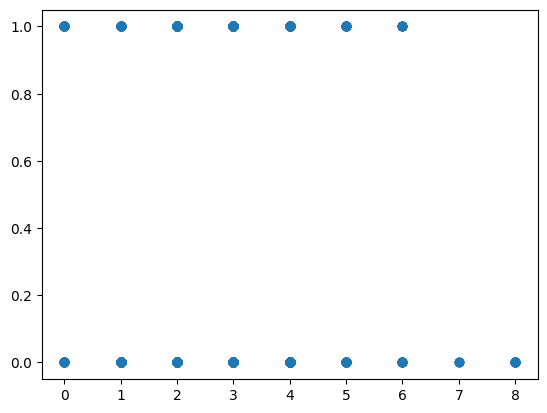

In [35]:
plt.scatter(ds["age_grp"],ds["survived"])

In [36]:
x = ds.iloc[:,0:1]
y = ds.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [39]:
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7321428571428571

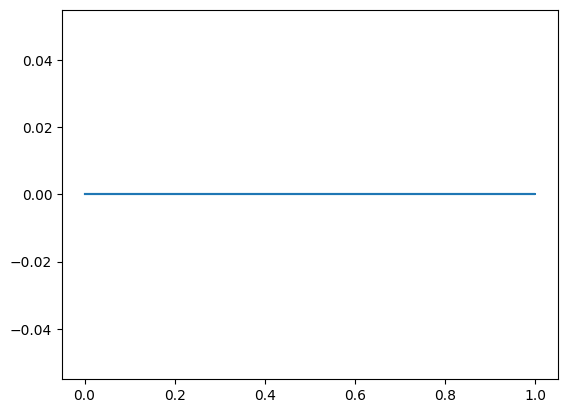

In [42]:
plt.plot(y_test,y_pred)

# Multinomial Logistic Regression

In [55]:
df = pd.read_csv("mlr titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
# delete unwanted columns
df.drop(["Name","Ticket","Cabin"],inplace=True,axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Embarked"] = le.fit_transform(df["Embarked"])
df["Sex"] = le.fit_transform(df["Sex"])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


In [73]:
# drop(delete) null values
df.dropna(inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Sex          417 non-null    int64  
 4   Age          417 non-null    int64  
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     417 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 32.6 KB


In [75]:
x = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [77]:
model.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_pred = model.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7321428571428571

In [83]:
# plt.plot(y_test,y_pred)

# Using Decision Tree Algorithm

In [84]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [86]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
y_pre = model.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pre)

0.7366071428571429

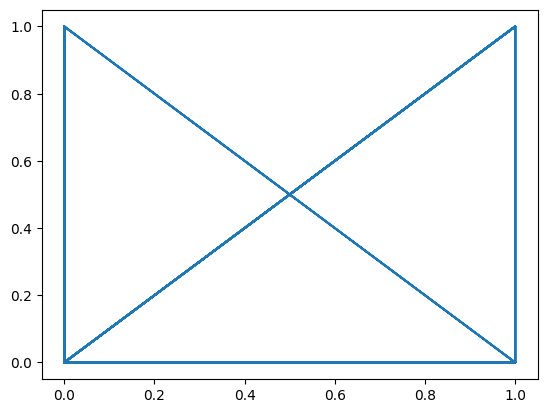

In [92]:
plt.plot(y_test,y_pre)

# Using Random Forest Algorithm

In [93]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [94]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [95]:
y_p = model.predict(x_test)

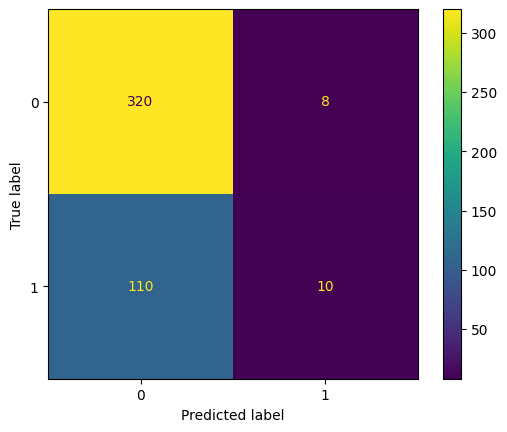

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
c = confusion_matrix(y_test,y_p)
cm = ConfusionMatrixDisplay(confusion_matrix=c)
cm.plot()